In [1]:
#install.packages("tidyverse")
library(tidyverse)
library(modelr)
# Data Handling

if (!requireNamespace("BiocManager"))
    install.packages("BiocManager")
BiocManager::install()
library(BiocManager)
# General bioinformatics packages

library(BSgenome)
library(BSgenome.Hsapiens.UCSC.hg19)
# Human genome build GChr37

library(biomaRt)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  2.0.1     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘tibble’ was built under R version 3.5.2”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required namespace: BiocManager
Bioconductor version 3.8 (BiocManager 1.30.3), R 3.5.1 (2018-07-02)
Update old packages: 'annotate', 'assertthat', 'backports', 'BiocInstaller',
  'BiocManager', 'BiocParallel', 'Biostrings', 'biovizBase', 'broom', 'Cairo',
  'callr', 'caTools', 'checkmate', 'circlize', 'class', 'cli', 'clipr',
  'cluster', 'clusterProfiler', 'codetools', 'colorspace', 'cowplot', 'curl',
  'data.table', 'dbplyr', 'DESeq', 'devtools', 'DOSE', 'dplyr', 'e1071',
  'EDASeq', 'edgeR', 'ELMER', 'ensembldb', 'evaluate', 'forcats

In [2]:
source("TMB_Funcs.txt")
# My Stuff!

path_name <- "/Volumes/CCG8/processed_data"
genome <- BSgenome.Hsapiens.UCSC.hg19
ensembl = useMart("ensembl", dataset = "hsapiens_gene_ensembl", host = "www.ensembl.org")
ensembl37 = useMart(host = "grch37.ensembl.org", biomart = "ENSEMBL_MART_ENSEMBL", dataset = "hsapiens_gene_ensembl")
select <- dplyr::select

### Loading Data

In [5]:
tmb_patient <- read_tsv(paste0(path_name, "/tmb_mskcc_2018/data_clinical_patient.txt"), comment = "#")

Parsed with column specification:
cols(
  PATIENT_ID = col_character(),
  TMB_SCORE = col_double(),
  SEX = col_character(),
  OS_MONTHS = col_integer(),
  OS_STATUS = col_character(),
  AGE_GROUP = col_character(),
  DRUG_TYPE = col_character()
)


In [6]:
tmb_clinical <- read_tsv(paste0(path_name, "/tmb_mskcc_2018/data_clinical_sample.txt"), comment = "#")

Parsed with column specification:
cols(
  PATIENT_ID = col_character(),
  SAMPLE_ID = col_character(),
  CANCER_TYPE = col_character(),
  SAMPLE_TYPE = col_character(),
  SAMPLE_CLASS = col_character(),
  METASTATIC_SITE = col_character(),
  PRIMARY_SITE = col_character(),
  CANCER_TYPE_DETAILED = col_character(),
  GENE_PANEL = col_character(),
  SAMPLE_COVERAGE = col_integer(),
  TUMOR_PURITY = col_character(),
  ONCOTREE_CODE = col_character(),
  INSTITUTE = col_character(),
  SOMATIC_STATUS = col_character(),
  AGE_AT_SEQ_REPORT = col_integer()
)


In [7]:
three_cancer_data <- read_rds("/Users/jacobbradley/Documents/CCG/Data/three_cancer_data")
lung_data <- read_rds("/Users/jacobbradley/Documents/CCG/Data/lung_data")

In [8]:
tmb_data <- cbio_getData(path_name, "mixed", by_cancer = TRUE, test = FALSE) %>% 
    filter(study == "tmb_mskcc_2018") %>% 
    select(-study)

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "all_stjude_2013"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 44


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "cellline_ccle_broad"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Chromosome = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  `MA:FIS` = col_double(),
  ONCOTATOR_PROTEIN_POS_END = col_integer(),
  ONCOTATOR_PROTEIN_POS_END_BEST_EFFECT = col_integer(),
  ONCOTATOR_EXON_AFFECTED = col_integer(),
  MA = col_integer(),
  ONCOTATOR_PROTEIN_POS_START = col_integer(),
  ONCOTATOR_EXON_AFFECTED_BEST_EFFECT = col_integer(),
  ONCOTATOR_PROTEIN_POS_START_BEST_EFFECT = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“2898 parsing failures.
row # A tibble: 5 x 5 col     row col      expected  actual file                                           expe

[1] "cellline_nci60"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  `MA:FIS` = col_double(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  HGVS_OFFSET = col_integer()
  # ... with 4 more columns
)
See spec(...) for full column specifications.


[1] 60


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "hnc_mskcc_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_depth = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double()
  # ... with 7 more columns
)
See spec(...) for full column specifications.


[1] 127


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "mixed_allen_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  NCBI_Build = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Transcript_Exon = col_integer(),
  t_alt_count = col_integer(),
  t_ref_count = col_integer(),
  Pr_somatic_clonal = col_double(),
  Pr_germline = col_integer(),
  Pr_subclonal = col_double(),
  homozygous.ix = col_logical(),
  ccf_hat = col_double(),
  clonal_dm = col_integer(),
  hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 249


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "mixed_pipseq_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  STRAND_VEP = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_OTH = col_double(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer()
  # ... with 1 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“72 parsing failures.
row # A tibble: 5 x 5 col     row col   expected   actual    file                                        

[1] 99


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "msk_impact_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 10078


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "pediatric_dkfz_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  STRAND_VEP = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_OTH = col_double(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer()
  # ... with 1 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 2)”Warning message:
“1 parsing failure.
row # A tibble: 1 x 5 col     row col   expected   actual   file                                           

[1] "summit_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Tumor_Sample_Barcode = col_integer(),
  t_depth = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  ExAC_AF_Adj = col_double()
)
See spec(...) for full column specifications.


[1] 106


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "tmb_mskcc_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 1608


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] 11172


In [9]:
panel <- read_tsv("/Users/jacobbradley/Documents/CCG/Data/2.5Mpanel.txt")
panel <- panel$panel
impact_panel <- tmb_data %>% 
    pull(Hugo_Symbol) %>% 
    unique()

Parsed with column specification:
cols(
  panel = col_character()
)


In [10]:
patient_sample <- full_join(tmb_patient, tmb_clinical, by = "PATIENT_ID") %>% 
    select(PATIENT_ID, SAMPLE_ID)

### Cancer Type, Treatment and TMB Demographics

In [11]:
library(survival)
library(survminer)
library(coin)

Loading required package: ggpubr
Loading required package: magrittr

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract

Warning message:
“package ‘coin’ was built under R version 3.5.2”

In [13]:
tmb_class_data <- tmb_patient %>% 
    full_join(tmb_clinical, by = "PATIENT_ID") %>% 
    group_by(CANCER_TYPE) %>% 
    mutate(TMB_quant_9 = quantile(TMB_SCORE, 0.9)) %>% 
    mutate(TMB_quant_8 = quantile(TMB_SCORE, 0.8)) %>% 
    mutate(TMB_Class = if_else(TMB_SCORE > TMB_quant_9, 1, 3)) %>% 
    mutate(TMB_Class = if_else((TMB_SCORE > TMB_quant_8) & (TMB_SCORE < TMB_quant_9), 2, TMB_Class)) %>% 
    ungroup()

tmb_surv <- tmb_class_data %>% 
    {Surv(time = .$OS_MONTHS, event = (.$OS_STATUS == "DECEASED"))}

fit_tmb <- tmb_class_data %>% 
    {survfit(tmb_surv ~ TMB_Class, data = .)}
           
           
     

Class 1 = top 10% within cancer type, Class 2 = top 10-20% within cancer type, Class 3 = bottom 80% within cancer type

In [14]:
tmb_class_data %>% 
    count(TMB_Class)

TMB_Class,n
1,158
2,146
3,1357


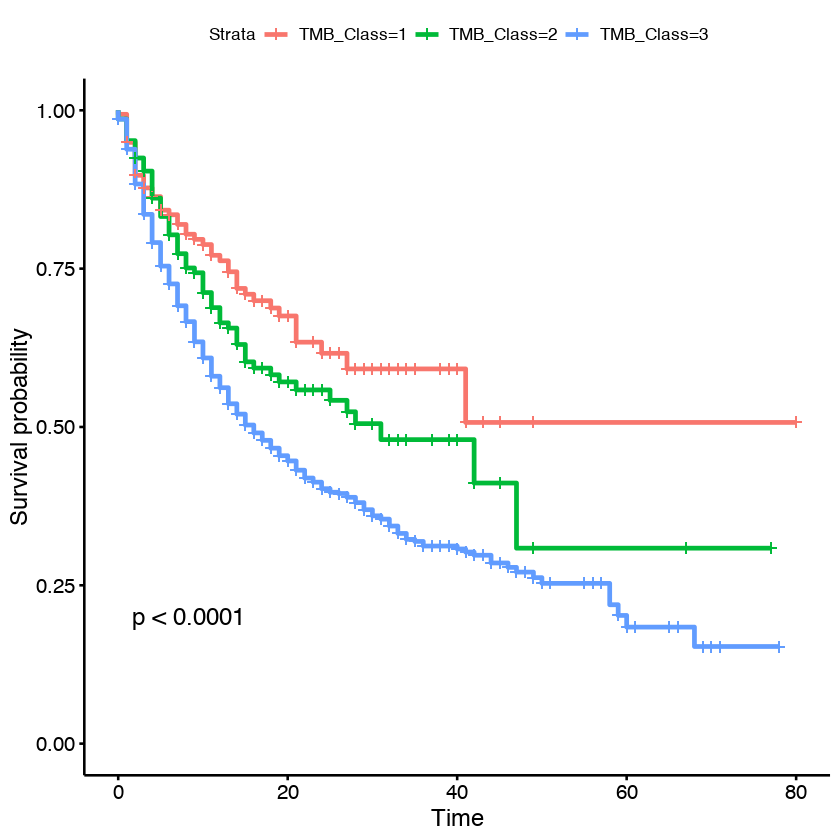

In [15]:
ggsurvplot(fit_tmb, data = tmb_class_data, pval = TRUE)

In [16]:
tmb_clinical %>% 
    group_by(CANCER_TYPE) %>% 
    count() %>% 
    arrange(desc(n))

CANCER_TYPE,n
Non-Small Cell Lung Cancer,350
Melanoma,320
Bladder Cancer,215
Renal Cell Carcinoma,151
Head and Neck Cancer,139
Esophagogastric Cancer,126
Glioma,117
Colorectal Cancer,110
Cancer of Unknown Primary,88
Breast Cancer,44


In [17]:
tmb_clinical %>% 
    group_by(ONCOTREE_CODE) %>% 
    count() %>% 
    arrange(desc(n))

ONCOTREE_CODE,n
LUAD,271
SKCM,187
BLCA,147
CCRCC,121
COAD,85
GBM,82
UTUC,47
LUSC,45
MUP,44
ESCA,39


In [342]:
drug <- "Drug Type "
tmb_patient_drug <- tmb_patient %>% 
    group_by(DRUG_TYPE) %>% 
    nest() %>% 
    mutate(n_cancer = unlist(map(data, nrow))) %>% 
    unnest() %>% 
    ungroup() %>% 
    mutate(DRUG_TYPE = paste0(" ", DRUG_TYPE, "\n (n = ", n_cancer, ")")) 
    



drug_surv <-  tmb_patient_drug %>% 
    {Surv(time = .$OS_MONTHS, event = (.$OS_STATUS == "DECEASED"))}

drug_fit <- survfit(drug_surv ~ DRUG_TYPE , data = tmb_patient_drug)

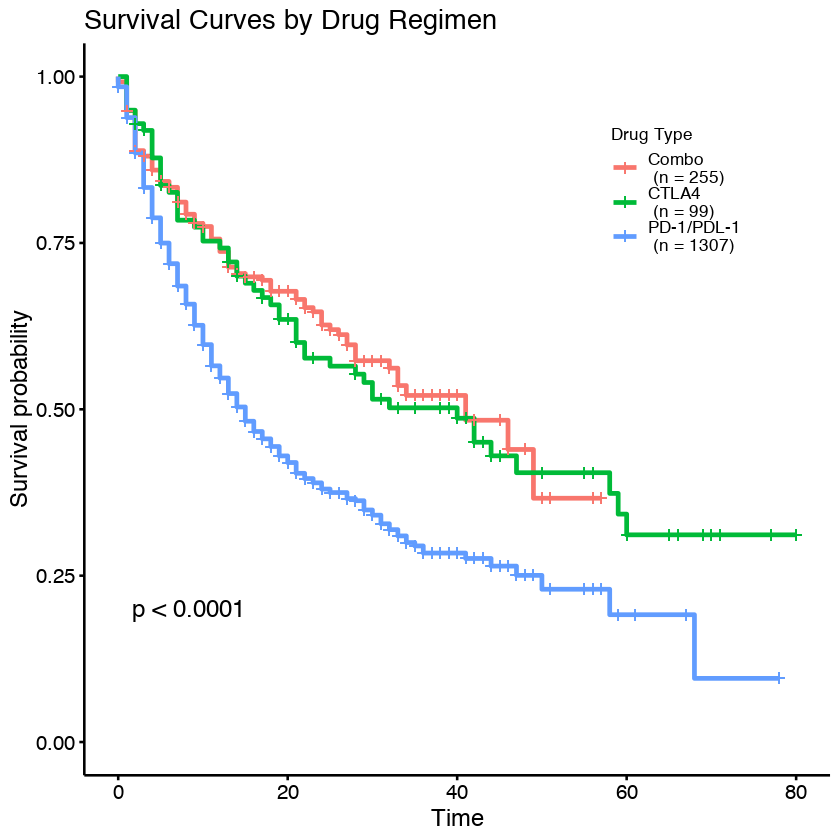

In [356]:
ggsurvplot(drug_fit, data = tmb_patient_drug, pval = TRUE, legend = c(0.8, 0.8), legend.title = "Drug Type",
           legend.labs = c("Combo \n (n = 255)", "CTLA4 \n (n = 99)", "PD-1/PDL-1 \n (n = 1307)"),
           title = "Survival Curves by Drug Regimen") 

In [323]:
?rename

In [20]:
tmb_patient %>% 
    group_by(DRUG_TYPE) %>% 
    count()

DRUG_TYPE,n
Combo,255
CTLA4,99
PD-1/PDL-1,1307


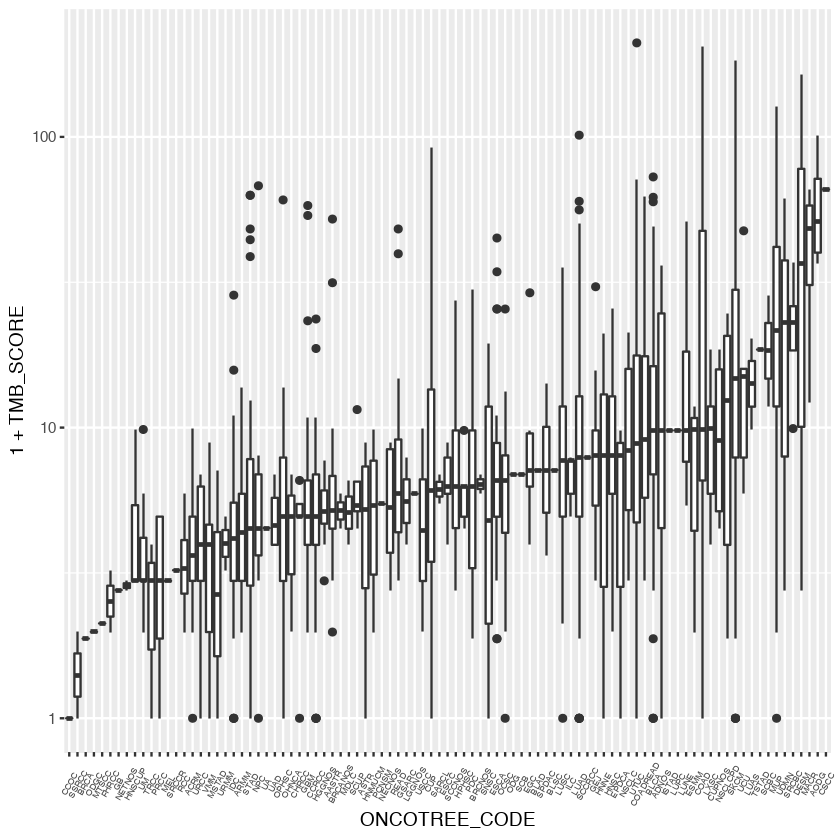

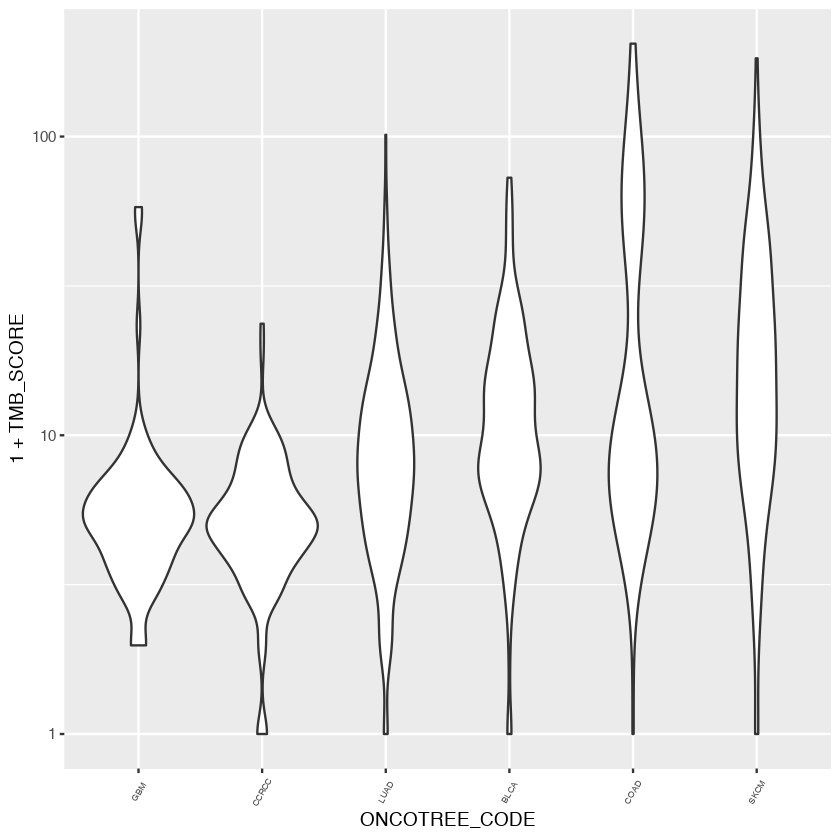

In [21]:
demog_data <- tmb_clinical %>% 
    select(SAMPLE_ID, PATIENT_ID, ONCOTREE_CODE) %>%    
    full_join(tmb_patient, by = "PATIENT_ID") %>% 
    select(PATIENT_ID, SAMPLE_ID, ONCOTREE_CODE, TMB_SCORE) %>%
    group_by(ONCOTREE_CODE) %>% 
    nest() %>% 
    mutate(cancer_type_median = unlist(map(data, ~median(.x$TMB_SCORE))),
           n_cancer = unlist(map(data, nrow))) %>% 
    unnest() %>%
    arrange(cancer_type_median) %>% 
    mutate(ONCOTREE_CODE = factor(ONCOTREE_CODE, levels = unique(ONCOTREE_CODE)))

demog_data %>% 
    ggplot(aes(y = 1 + TMB_SCORE, x = ONCOTREE_CODE)) + geom_boxplot() + scale_y_log10() + 
    theme(axis.text.x = element_text(angle = 60, size = 5, vjust = 0.5))
demog_data %>% 
    filter(n_cancer > 50) %>% 
    ggplot(aes(y = 1 + TMB_SCORE, x = ONCOTREE_CODE)) + geom_violin() + scale_y_log10() + 
    theme(axis.text.x = element_text(angle = 60, size = 5, vjust = 0.5))

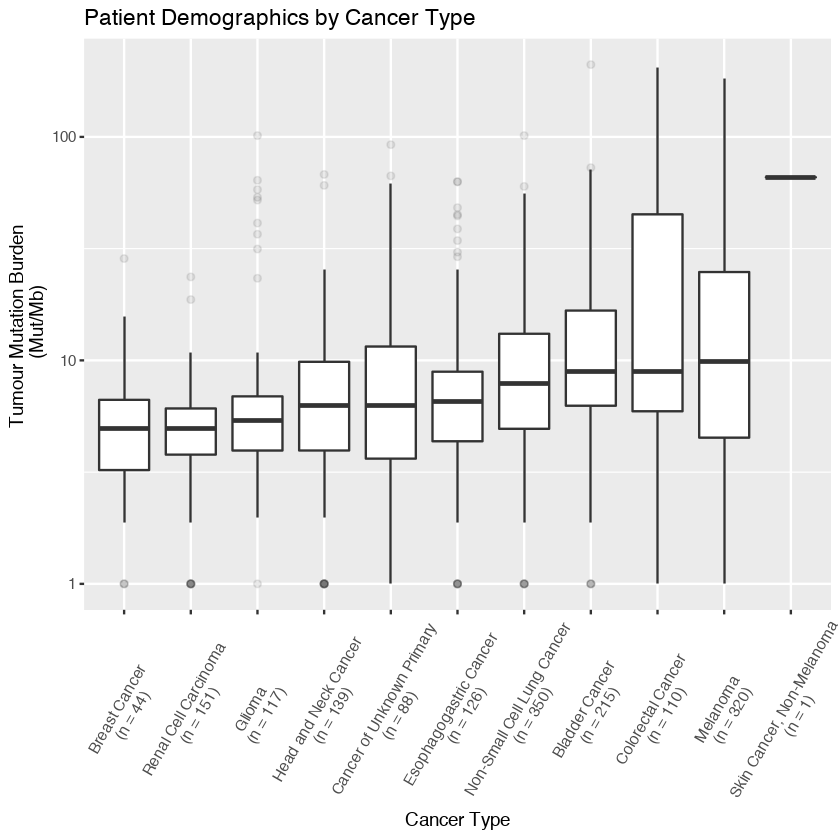

In [353]:
tmb_patient %>% 
    full_join(tmb_clinical, by = "PATIENT_ID")  %>% 
    group_by(CANCER_TYPE) %>% 
    nest() %>% 
    mutate(cancer_type_median = unlist(map(data, ~median(.x$TMB_SCORE))),
           n_cancer = unlist(map(data, nrow))) %>% 
    unnest() %>%
    mutate(CANCER_TYPE = paste0(CANCER_TYPE, "\n (n = ", n_cancer,")")) %>% 
    arrange(cancer_type_median) %>% 
    mutate(CANCER_TYPE = factor(CANCER_TYPE, levels = unique(CANCER_TYPE))) %>% 
    {ggplot(., aes(y = 1 + TMB_SCORE, x = CANCER_TYPE)) + geom_boxplot(outlier.alpha = 0.1) +
    scale_y_log10() + theme(axis.text.x = element_text(angle = 60, vjust = 0.5, size = 9))} + 
    labs(x = "Cancer Type", y = "Tumour Mutation Burden \n (Mut/Mb)", 
         title = "Patient Demographics by Cancer Type")
   

In [297]:
?geom_boxplot

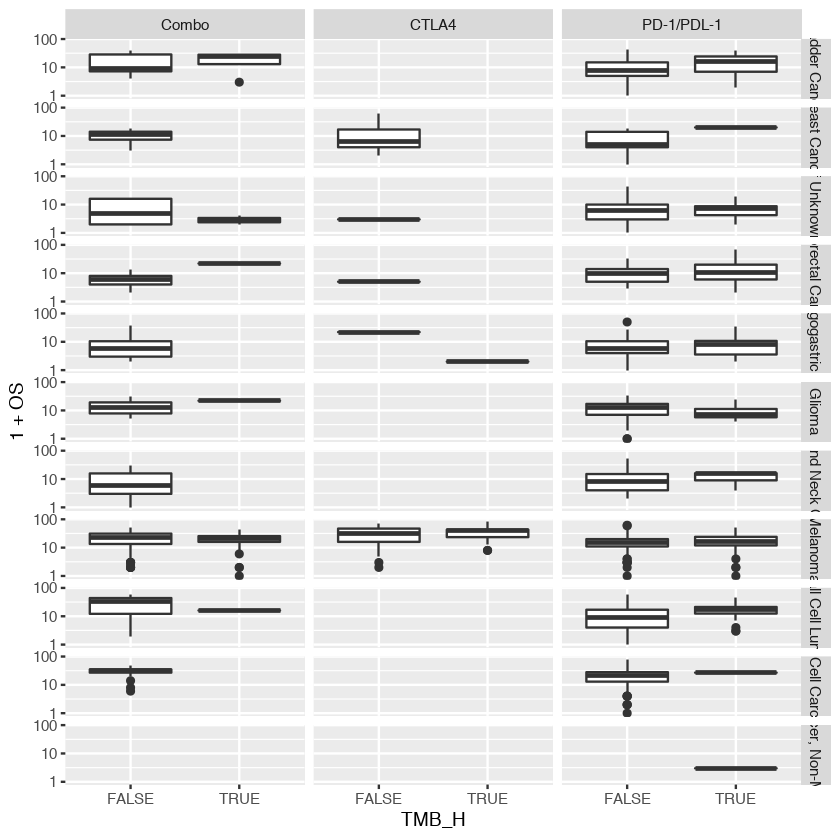

In [23]:
tmb_patient %>% 
    full_join(patient_sample, by = "PATIENT_ID") %>% 
    mutate(Tumor_Sample_Barcode = SAMPLE_ID, TMB = TMB_SCORE, OS = OS_MONTHS, TMB_H = TMB_SCORE > 20) %>% 
    full_join(tmb_clinical, by = "SAMPLE_ID") %>%
    select(Tumor_Sample_Barcode, OS, TMB, TMB_H, ONCOTREE_CODE, CANCER_TYPE, SEX, AGE_GROUP, DRUG_TYPE) %>% 
    group_by(ONCOTREE_CODE) %>% 
    nest() %>% 
    mutate(n_cancer = unlist(map(data, nrow))) %>% 
    unnest() %>% 
    #filter(n_cancer > 50) %>% 
    ggplot(aes(x = TMB_H, y = 1 + OS)) + geom_boxplot() + facet_grid(CANCER_TYPE ~ DRUG_TYPE) + scale_y_log10()
    

### IMPACT vs CCG for TMB estimation

In [228]:
panel_bed <- get_bed(panel)
write_tsv(x = panel_bed, path = "/Users/jacobbradley/Documents/CCG/Data/TMB_Panel.bed")

impact_panel_bed <- get_bed(impact_panel)
write_tsv(x = impact_panel_bed, path = "/Users/jacobbradley/Documents/CCG/Data/IMPACT_panel.bed")
resistance_panel <- c(panel, "TP53", "SMARC4", "STK11", "KEAP1") %>% 
    unique()
write_tsv(x = tibble(panel = resistance_panel), path = "/Users/jacobbradley/Documents/CCG/Data/ICB_panel_genes")

ICB_panel_bed <- get_bed(resistance_panel)
write_tsv(x = ICB_panel_bed, path = "/Users/jacobbradley/Documents/CCG/Data/ICB_Panel.bed")

ERROR: Error in curl::curl_fetch_memory(url, handle = handle): Operation was aborted by an application callback


In [224]:
ICB_panel_bed %>% 
    mutate(diff = chromEnd - chromStart) %>% 
    pull(diff) %>% 
    sum()
impact_panel_bed %>% 
    mutate(diff = chromEnd - chromStart) %>% 
    pull(diff) %>% 
    sum()

[1] 259292

[1] 1181644

IMPACT PANEL is over 4.5 times larger than CCG panel.

### Resistance Genes: First Question

Produce a training matrix with columns treatment, cancer_type, TMB, IMPACT Genes

In [131]:
gene_matrix <- tmb_data %>% 
    select(Tumor_Sample_Barcode, Hugo_Symbol)  %>% 
    group_by(Tumor_Sample_Barcode, Hugo_Symbol) %>% 
    summarise(n = n()) %>% 
    ungroup() %>% 
    spread(Hugo_Symbol, n)

gene_names <- setdiff(colnames(gene_matrix), "Tumor_Sample_Barcode")


gene_matrix <- full_join(gene_matrix, patient_sample, by = c("Tumor_Sample_Barcode" = "SAMPLE_ID"))
gene_matrix <- full_join(gene_matrix, tmb_patient, by = "PATIENT_ID")
gene_matrix <- full_join(gene_matrix, tmb_clinical %>% 
                                          select(SAMPLE_ID, CANCER_TYPE), by = c("Tumor_Sample_Barcode" = "SAMPLE_ID"))

gene_matrix[is.na(gene_matrix)] <- 0

for(col in gene_names) {
    gene_matrix[[col]] <- factor(gene_matrix[[col]] > 0)
}


In [284]:
gene_matrix <- gene_matrix %>% 
    group_by(CANCER_TYPE) %>% 
    mutate(TMB_H = factor(TMB_SCORE >= quantile(TMB_SCORE, 0.8), levels = c(FALSE, TRUE))) %>%
    ungroup()
    

In [150]:
gene_matrix %>% 
    mutate(res_detect = as.logical(TP53)|as.logical(SMARCA4)|as.logical(KEAP1)|as.logical(STK11)) %>% 
    {nrow(filter(., res_detect))/nrow(.)}

[1] 0.5183624

In [287]:
# Testing each gene with TMB as continuous cofactor
surv_gene <- Surv(time = gene_matrix$OS_MONTHS, event = (gene_matrix$OS_STATUS == "DECEASED"))
n_genes <- length(gene_names)
significant_genes <- tibble(n_muts = rep(0, n_genes), cox_p = rep(0, n_genes), 
                            cox_z = rep(0, n_genes), cox_h = rep(0, n_genes), 
                            log_p = rep(0, n_genes), log_z = rep(0, n_genes), 
                            gene_names = gene_names)

for (i in 1:n_genes) {
    
    n_muts <- gene_matrix %>% 
        pull(!!gene_names[i]) %>% 
        {as.logical(as.character(.))} %>% 
        sum()
    
    form1 <- as.formula(paste("surv_gene ~ TMB_SCORE +", gene_names[i]))
    form2 <- as.formula(paste("surv_gene ~", gene_names[i],"| TMB_H"))
    gene_coxph <- coxph(form1, data = gene_matrix)
    gene_logr <- logrank_test(form2, data = gene_matrix, distribution = "approximate")
    message(gene_names[i])
    
    significant_genes[i,1] <- n_muts
    significant_genes[i,2] <- summary(gene_coxph)$coefficients[2,5]
    significant_genes[i,3] <- summary(gene_coxph)$coefficients[2,4]
    significant_genes[i,4] <- summary(gene_coxph)$coefficients[2,2]
    significant_genes[i,5] <- pvalue(gene_logr)[1]
    significant_genes[i,6] <- statistic(gene_logr)
}

significant_genes$cox_p <- p.adjust(significant_genes$cox_p, method = "BH")
significant_genes$log_p <- p.adjust(significant_genes$log_p, method = "BH")

ABL1
ACVR1
AGO2
AKT1
AKT2
AKT3
ALK
ALOX12B
AMER1
ANKRD11
APC
AR
ARAF
ARID1A
ARID1B
ARID2
ARID5B
ASXL1
ASXL2
ATM
ATR
ATRX
AURKA
AURKB
AXIN1
AXIN2
AXL
B2M
BABAM1
BAP1
BARD1
BBC3
BCL10
BCL2
Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged before variable  2 ; beta may be infinite. ”BCL2L1
BCL2L11
BCL6
BCOR
BIRC3
BLM
BMPR1A
BRAF
BRCA1
BRCA2
BRD4
BRIP1
BTK
CALR
CARD11
CARM1
CASP8
CBFB
CBL
CCND1
CCND2
CCND3
Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged before variable  2 ; beta may be infinite. ”CCNE1
CD274
CD276
CD79A
CD79B
CDC42
CDC73
CDH1
CDK12
CDK4
CDK6
CDK8
CDKN1A
CDKN1B
CDKN2A
CDKN2Ap14ARF
Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged before variable  2 ; beta may be infinite. ”CDKN2Ap14IRF
CDKN2Ap16INK4A
CDKN2B
CDKN2C
CEBPA
CENPA
CHEK1
CHEK2
CIC
CREBBP
CRKL
CRLF2
CSDE1
CSF1R
CSF3R
CTCF
CTLA4
CTNNB1
CUL3
CXCR4
CYLD
CYSLTR2


In [285]:
# Testing each gene with TMB as categorical cofactor
surv_gene <- Surv(time = gene_matrix$OS_MONTHS, event = (gene_matrix$OS_STATUS == "DECEASED"))
n_genes <- length(gene_names)
significant_genes_h <- tibble(n_muts = rep(0, n_genes), cox_p = rep(0, n_genes), 
                            cox_z = rep(0, n_genes), cox_h = rep(0, n_genes), 
                            log_p = rep(0, n_genes), log_z = rep(0, n_genes), 
                            gene_names = gene_names)

for (i in 1:n_genes) {
    
    n_muts <- gene_matrix %>% 
        pull(!!gene_names[i]) %>% 
        {as.logical(as.character(.))} %>% 
        sum()
    
    form1 <- as.formula(paste("surv_gene ~ TMB_H +", gene_names[i]))
    form2 <- as.formula(paste("surv_gene ~", gene_names[i],"| TMB_H"))
    gene_coxph <- coxph(form1, data = gene_matrix)
    gene_logr <- logrank_test(form2, data = gene_matrix, distribution = "approximate")
    message(gene_names[i])
    
    significant_genes_h[i,1] <- n_muts
    significant_genes_h[i,2] <- summary(gene_coxph)$coefficients[2,5]
    significant_genes_h[i,3] <- summary(gene_coxph)$coefficients[2,4]
    significant_genes_h[i,4] <- summary(gene_coxph)$coefficients[2,2]
    significant_genes_h[i,5] <- pvalue(gene_logr)[1]
    significant_genes_h[i,6] <- statistic(gene_logr)
}

significant_genes_h$cox_p <- p.adjust(significant_genes_h$cox_p, method = "BH")
significant_genes_h$log_p <- p.adjust(significant_genes_h$log_p, method = "BH")

ABL1
ACVR1
AGO2
AKT1
AKT2
AKT3
ALK
ALOX12B
AMER1
ANKRD11
APC
AR
ARAF
ARID1A
ARID1B
ARID2
ARID5B
ASXL1
ASXL2
ATM
ATR
ATRX
AURKA
AURKB
AXIN1
AXIN2
AXL
B2M
BABAM1
BAP1
BARD1
BBC3
BCL10
BCL2
Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged before variable  2 ; beta may be infinite. ”BCL2L1
BCL2L11
BCL6
BCOR
BIRC3
BLM
BMPR1A
BRAF
BRCA1
BRCA2
BRD4
BRIP1
BTK
CALR
CARD11
CARM1
CASP8
CBFB
CBL
CCND1
CCND2
CCND3
Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged before variable  2 ; beta may be infinite. ”CCNE1
CD274
CD276
CD79A
CD79B
CDC42
CDC73
CDH1
CDK12
CDK4
CDK6
CDK8
CDKN1A
CDKN1B
CDKN2A
CDKN2Ap14ARF
Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged before variable  2 ; beta may be infinite. ”CDKN2Ap14IRF
CDKN2Ap16INK4A
CDKN2B
CDKN2C
CEBPA
CENPA
CHEK1
CHEK2
CIC
CREBBP
CRKL
CRLF2
CSDE1
CSF1R
CSF3R
CTCF
CTLA4
CTNNB1
CUL3
CXCR4
CYLD
CYSLTR2


Warning message in .get_data(model, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

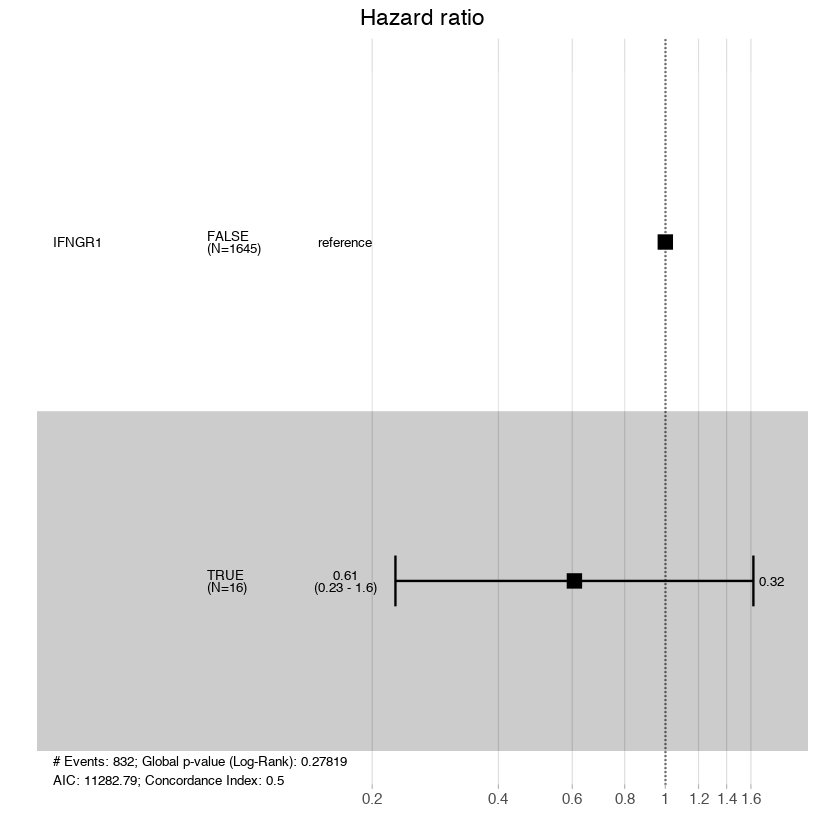

In [317]:
coxph(surv_gene ~ IFNGR1, data = gene_matrix) %>% 
    ggforest()

In [309]:
significant_genes %>% 
    filter(gene_names %in%  intersect(more_genes, impact_panel))

n_muts,cox_p,cox_z,cox_h,log_p,log_z,gene_names
33,0.8775719,1.377107555,1.4322747,0.9686087,0.1598834,B2M
16,0.9950095,-0.043932895,0.9781294,0.8130567,-0.6444303,IFNGR1
38,0.9956015,-0.008145316,0.9977760,0.8015208,-0.7051092,JAK1
35,0.9124140,-0.841268442,0.7501157,0.3182571,-1.9306287,JAK2


In [286]:
significant_genes_h %>% 
    gather(key = test_type, value = z_value, cox_z, log_z) %>%
    mutate(test_type = if_else(test_type == "cox_z", "Cox", "Log-Rank")) %>% 
    mutate(p_value = if_else(test_type == "Cox", cox_p, log_p)) %>%  
    filter((test_type == "Cox" & n_muts >= 30) | (test_type == "Log-Rank")) %>% 
    filter(p_value < 0.05 & z_value > 0) 

n_muts,cox_p,cox_h,log_p,gene_names,test_type,z_value,p_value
98,9.832736e-04,1.827619,0.0079,STK11,Cox,4.518659,9.832736e-04
738,3.434851e-06,1.510508,0.0000,TP53,Cox,5.785109,3.434851e-06
98,9.832736e-04,1.827619,0.0079,STK11,Log-Rank,3.854821,7.900000e-03
738,3.434851e-06,1.510508,0.0000,TP53,Log-Rank,5.390716,0.000000e+00


In [288]:
significant_genes %>% 
    gather(key = test_type, value = z_value, cox_z, log_z) %>%
    mutate(test_type = if_else(test_type == "cox_z", "Cox", "Log-Rank")) %>% 
    mutate(p_value = if_else(test_type == "Cox", cox_p, log_p)) %>%  
    filter((test_type == "Cox" & n_muts >= 30) | (test_type == "Log-Rank")) %>% 
    filter(p_value < 0.05 & z_value > 0) 
           

n_muts,cox_p,cox_h,log_p,gene_names,test_type,z_value,p_value
98,3.110269e-02,1.620719,0.06016154,KEAP1,Cox,3.467696,3.110269e-02
132,4.868108e-02,1.578975,0.40053000,SMARCA4,Cox,3.283016,4.868108e-02
98,5.054413e-04,1.862747,0.02031429,STK11,Cox,4.657611,5.054413e-04
738,5.207186e-07,1.531097,0.00000000,TP53,Cox,5.982519,5.207186e-07
98,5.054413e-04,1.862747,0.02031429,STK11,Log-Rank,3.854821,2.031429e-02
738,5.207186e-07,1.531097,0.00000000,TP53,Log-Rank,5.390716,0.000000e+00


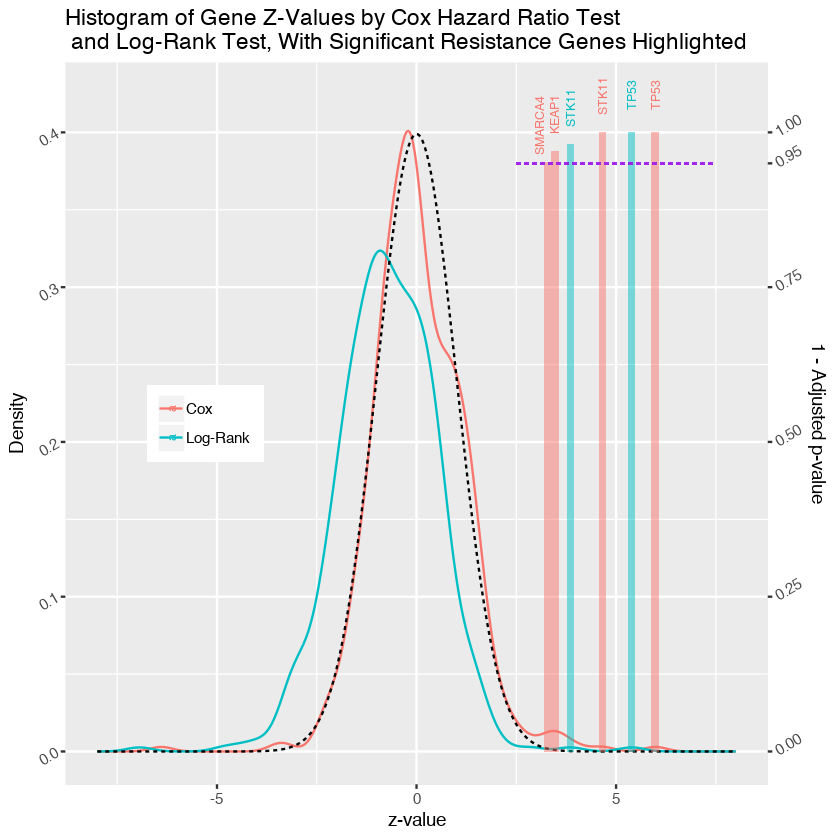

In [289]:
significant_genes %>% 
    gather(key = test_type, value = z_value, cox_z, log_z) %>%
    mutate(test_type = if_else(test_type == "cox_z", "Cox", "Log-Rank")) %>% 
    mutate(p_value = if_else(test_type == "Cox", cox_p, log_p)) %>% 
    {ggplot(.) +  geom_line(aes(z_value, colour = test_type), stat = "density") + 
    geom_line(data = tibble(x = seq(-8,8,0.01), y = dnorm(x)), 
                                         aes(x = x, y = y), linetype = 2) + 
    labs(x = "z-value", y = "Density", title = "Histogram of Gene Z-Values by Cox Hazard Ratio Test \n and Log-Rank Test, With Significant Resistance Genes Highlighted") + 
    scale_y_continuous(sec.axis = sec_axis(~.*2.5, name = "1 - Adjusted p-value", breaks = c(0, 0.25, 0.5, 0.75, 0.95, 1))) + 
    guides(fill = FALSE) + theme(axis.text.y = element_text(angle = 30)) + theme(legend.position = c(0.2, 0.5), legend.title = element_blank()) +
    geom_col(data = . %>%  
                    filter((test_type == "Cox" & n_muts >= 30) | (test_type == "Log-Rank")) %>% 
                    filter(p_value < 0.05 & z_value > 0),
             aes(x = z_value, y = (1 - p_value)/2.5, fill = test_type), alpha = 0.5) +
    geom_text(data = . %>%  
                    filter((test_type == "Cox" & n_muts >= 30) | (test_type == "Log-Rank")) %>% 
                    filter(p_value < 0.05 & z_value > 0),
              aes(x = if_else(gene_names == "SMARCA4", z_value - 0.2, z_value), y = (1.06 - p_value)/2.5 , label = gene_names, colour = test_type), angle = 90, size = 2.5) + 
    geom_segment(aes(x = 2.5, y = 0.4*0.95, xend = 7.5, yend = 0.4*0.95), colour = "purple", linetype = 2, alpha = 0.1)}


Warning message:
“Removed 2 rows containing missing values (geom_errorbar).”

Warning message:
“Removed 2 rows containing missing values (geom_errorbar).”

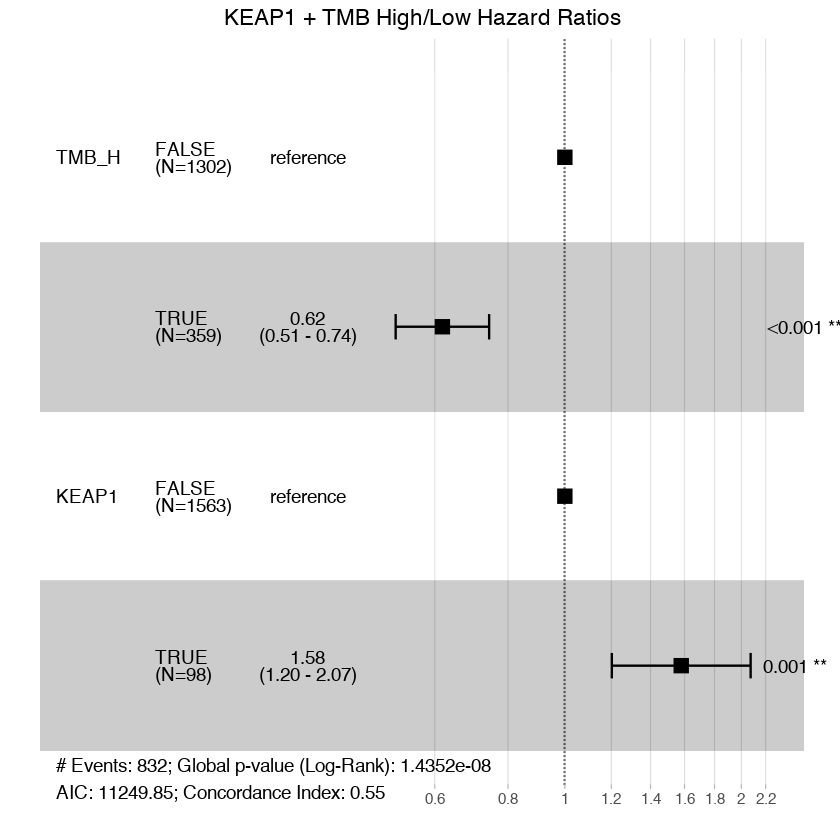

Warning message:
“Removed 2 rows containing missing values (geom_errorbar).”

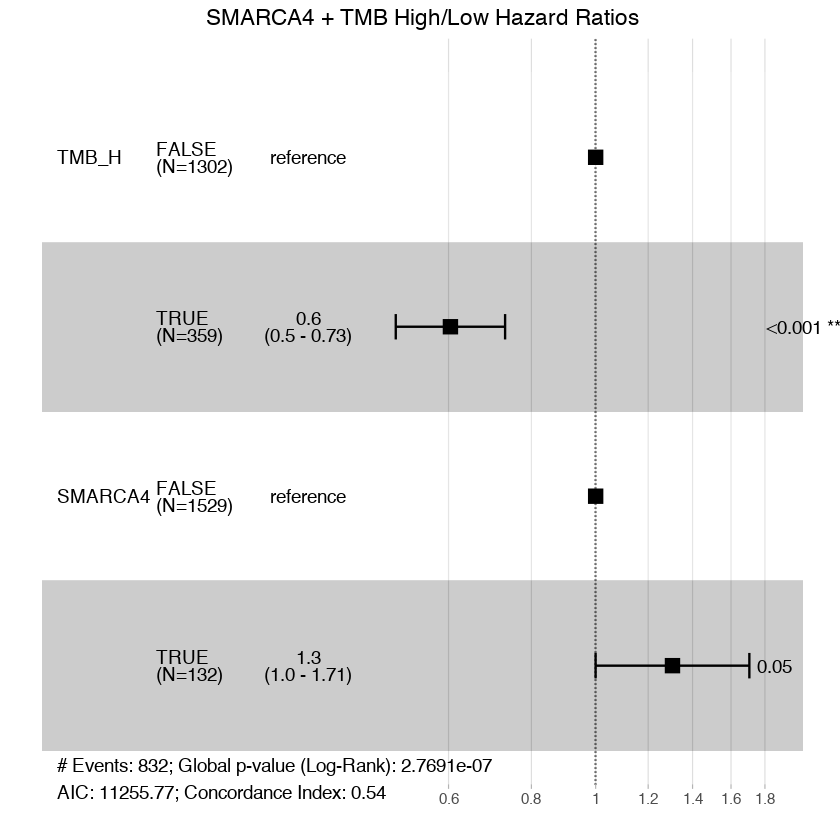

Warning message:
“Removed 2 rows containing missing values (geom_errorbar).”

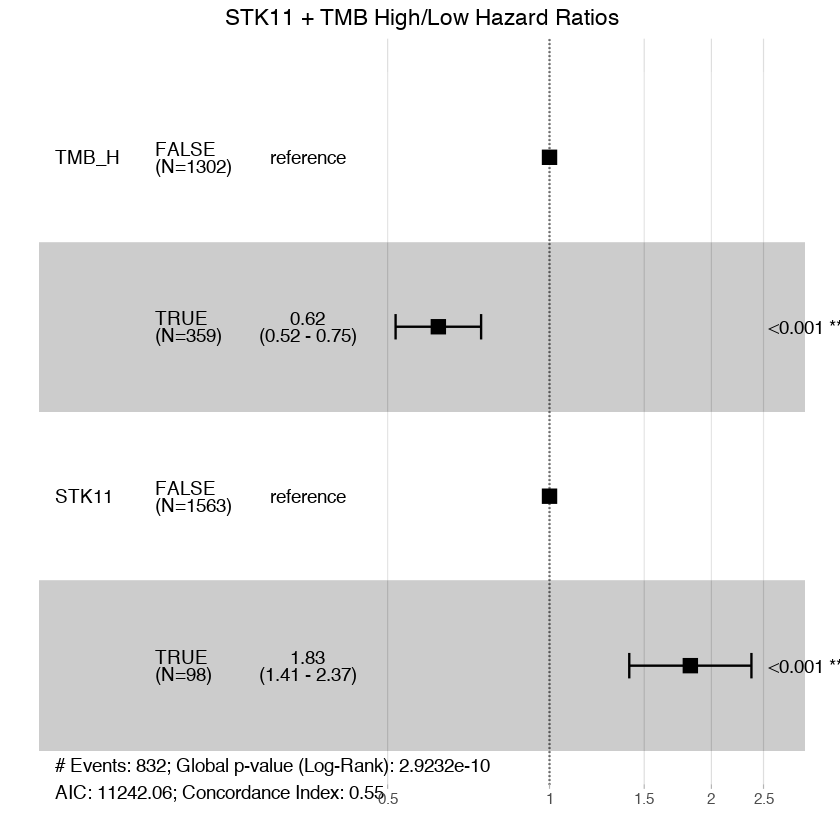

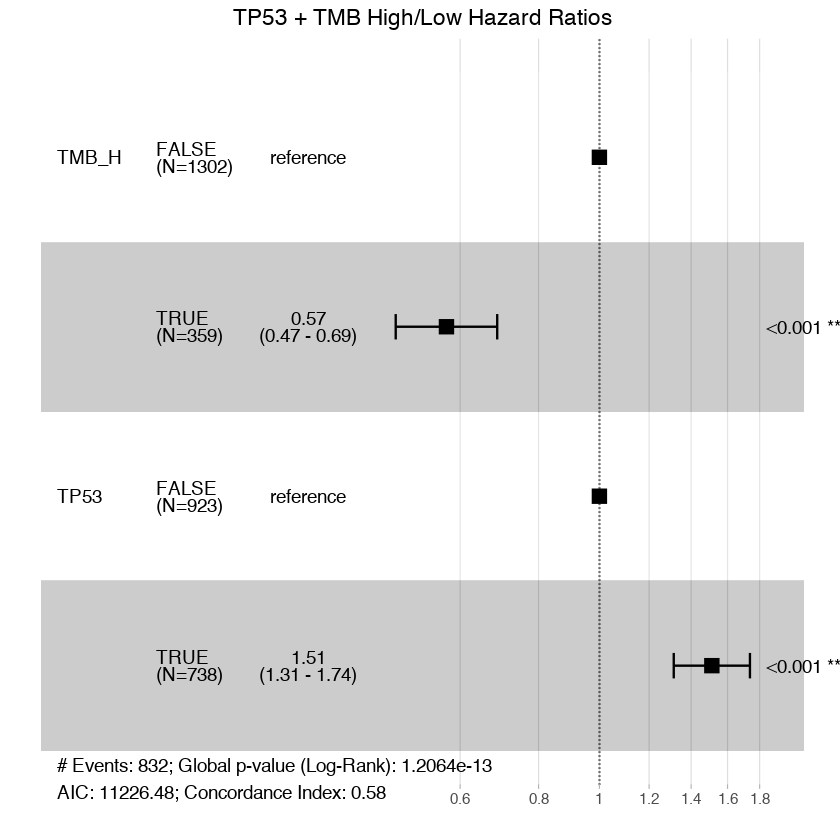

In [296]:
coxph(surv_gene ~ TMB_H + KEAP1, data = gene_matrix) %>% 
    ggforest(data = gene_matrix, fontsize = 1, cpositions = c(0.02, 0.15, 0.35), main = "KEAP1 + TMB High/Low Hazard Ratios")

coxph(surv_gene ~ TMB_H + SMARCA4, data = gene_matrix) %>% 
    ggforest(data = gene_matrix, fontsize = 1, cpositions = c(0.02, 0.15, 0.35), main = "SMARCA4 + TMB High/Low Hazard Ratios")


coxph(surv_gene ~ TMB_H + STK11, data = gene_matrix) %>% 
    ggforest(data = gene_matrix, fontsize = 1, cpositions = c(0.02, 0.15, 0.35), main = "STK11 + TMB High/Low Hazard Ratios")

coxph(surv_gene ~ TMB_H + TP53, data = gene_matrix) %>% 
    ggforest(data = gene_matrix, fontsize = 1, cpositions = c(0.02, 0.15, 0.35), main = "TP53 + TMB High/Low Hazard Ratios")


In [137]:
resistance_genes <- significant_genes %>% 
    filter((log_p < 0.05 & log_z > 0) | (n_muts > 30 & cox_p < 0.05 & cox_h > 1)) 
    

In [533]:
gene_matrix %>% 
    pull(!!gene) %>% 
    as.logical() %>% 
    length()

[1] 1661

In [297]:
get_gene_hrs <- function(gene_matrix, gene, tmb_cutoff = 0) {
   
    matrix <- gene_matrix %>% 
        group_by(CANCER_TYPE) %>% 
        filter(TMB_SCORE >= quantile(TMB_SCORE, tmb_cutoff)) %>% 
        ungroup()
   
    surv <- matrix %>% 
        {Surv(time = .$OS_MONTHS, event = (.$OS_STATUS == "DECEASED"))}
    
    cox <- coxph(as.formula(paste("surv ~ ", gene)), data = matrix)
    n_muts <- sum(as.logical(pull(matrix, !!gene)))
    n_n_muts <- nrow(matrix) - n_muts
    
    out <- list(summary(cox), min(n_muts, n_n_muts), if_else(n_muts < n_n_muts, "M", "N-M"))
    names(out) <- c("Cox Model", "min_class", "which_class")
    
    return(out)
        
}

In [298]:
get_h_profiles <- function(gene_matrix, genes, tmb_range) {
    
    out <- tibble(tmb_cutoff = vector(), hr = vector(), p = vector(), gene = character(), 
                  min_class = vector(), which_class = character())
    n <- length(genes)
    
    for (i in 1:n) {
        gene <- genes[i]
        message(gene)
        gene_hrs <- map(tmb_range, ~get_gene_hrs(gene_matrix, gene, .x))
        new <- tibble(tmb_cutoff = tmb_range, 
                      hr = unlist(map(gene_hrs, function(x) x[["Cox Model"]]$coefficients[,"exp(coef)"])),
                      p = unlist(map(gene_hrs, function(x) x[["Cox Model"]]$coefficients[,"Pr(>|z|)"])),
                      gene = gene, min_class = unlist(map(gene_hrs, function(x) x[["min_class"]])),
                      which_class = unlist(map(gene_hrs, function(x) x[["which_class"]])))
        
        out <- bind_rows(out, new)
    }
    
    return(out)
}

In [300]:
res_h_prof <- get_h_profiles(gene_matrix, c("TP53", "STK11", "KEAP1", "SMARCA4"), tmb_range = seq(0,0.9, 0.01)) 


TP53
STK11
KEAP1
SMARCA4


In [302]:
?geom_point

Warning message:
“Using alpha for a discrete variable is not advised.”

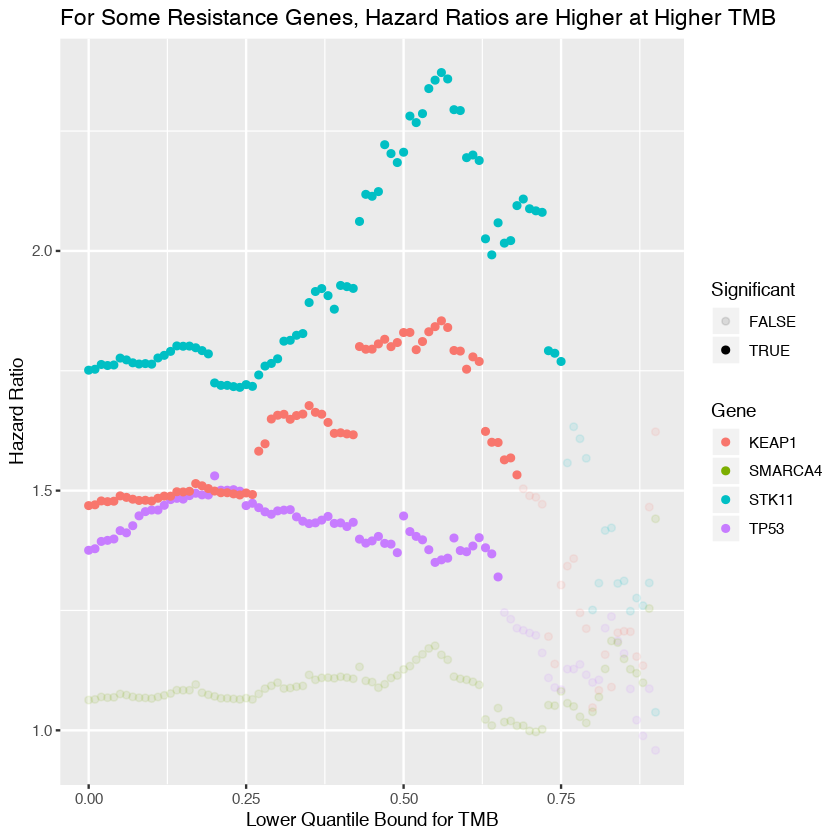

In [307]:
res_h_prof %>% 
    mutate(Significant = (p < 0.05) & (min_class >= 30), Gene = gene) %>% 
    ggplot(aes(x = tmb_cutoff, y = hr, alpha = Significant, colour = Gene)) + geom_point() + 
    labs(x = "Lower Quantile Bound for TMB", y = "Hazard Ratio", 
         title = "For Some Resistance Genes, Hazard Ratios are Higher at Higher TMB")

### NSCLC Case

In [42]:
nsclc_matrix <- tmb_data %>% 
    select(Tumor_Sample_Barcode, Hugo_Symbol)  %>% 
    group_by(Tumor_Sample_Barcode, Hugo_Symbol) %>% 
    summarise(n = n()) %>% 
    ungroup() %>% 
    spread(Hugo_Symbol, n)

nsclc_gene_names <- setdiff(colnames(nsclc_matrix), "Tumor_Sample_Barcode")



nsclc_matrix <- full_join(nsclc_matrix, patient_sample, by = c("Tumor_Sample_Barcode" = "SAMPLE_ID"))

nsclc_matrix <- full_join(nsclc_matrix, tmb_patient, by = "PATIENT_ID")
nsclc_matrix <- full_join(nsclc_matrix, tmb_clinical %>% 
                                          filter(CANCER_TYPE == "Non-Small Cell Lung Cancer") %>% 
                                          select(SAMPLE_ID, CANCER_TYPE), by = c("Tumor_Sample_Barcode" = "SAMPLE_ID")) %>% 
    filter(!is.na(CANCER_TYPE))

nsclc_matrix[is.na(nsclc_matrix)] <- 0

for(col in nsclc_gene_names) {
    nsclc_matrix[[col]] <- factor(nsclc_matrix[[col]] > 0) 
}

surv_nsclc <- Surv(time = nsclc_matrix$OS_MONTHS, event = (nsclc_matrix$OS_STATUS == "DECEASED"))
                  

In [704]:
# Testing each gene

n_nsclc_genes <- length(nsclc_gene_names)
significant_nsclc_genes <- tibble(n_muts = rep(0, n_nsclc_genes), cox_test = rep(FALSE, n_nsclc_genes), log_rank = rep(FALSE, n_nsclc_genes), gene_names = nsclc_gene_names)

for (i in 1:n_nsclc_genes) {
    
    n_muts <- nsclc_matrix %>% 
        pull(!!nsclc_gene_names[i]) %>% 
        {as.logical(as.character(.))} %>% 
        sum()
    
    form1 <- as.formula(paste("surv_nsclc ~ TMB_SCORE +", nsclc_gene_names[i]))
    form2 <- as.formula(paste("surv_nsclc ~", nsclc_gene_names[i]))
    gene_coxph <- coxph(form1, data = nsclc_matrix)
    gene_logr <- logrank_test(form2, data = nsclc_matrix, distribution = "approximate")
    message(nsclc_gene_names[i])
    
    significant_nsclc_genes[i,1] <- n_muts
    significant_nsclc_genes[i,2] <- summary(gene_coxph)$coefficients[2,5]
    significant_nsclc_genes[i,3] <- pvalue(gene_logr)[1]
}

significant_nsclc_genes$cox_test <- p.adjust(significant_nsclc_gene$cox_test, method = "BH")
significant_nsclc_genes$log_rank <- p.adjust(significant_nsclc_gene$log_rank, method = "bonferroni")


ABL1
Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged before variable  2 ; beta may be infinite. ”ACVR1
AGO2
AKT1
AKT2
AKT3
ALK
ALOX12B
AMER1
ANKRD11
APC
AR
ARAF
ARID1A
ARID1B
ARID2
ARID5B
ASXL1
ASXL2
ATM
ATR
ATRX
AURKA
AURKB
AXIN1
AXIN2
AXL
B2M
BABAM1
BAP1
BARD1
Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged before variable  2 ; beta may be infinite. ”BBC3
BCL10
BCL2
Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged before variable  2 ; beta may be infinite. ”BCL2L1
BCL2L11
BCL6
BCOR
BIRC3
BLM
BMPR1A
BRAF
BRCA1
BRCA2
BRD4
BRIP1
BTK
CALR
CARD11
Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged before variable  2 ; beta may be infinite. ”CARM1
CASP8
CBFB
CBL
CCND1
CCND2
CCND3
Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged be

In [332]:
# Hazard ratio for different TMB cutoffs
tmb_cutoff <- seq(0.1,0.9, 0.01)
N <- length(tmb_cutoff)

cutoff_hrs <- tibble(tmb_cutoff, hr = unlist(map(tmb_cutoff,~summary(coxph(surv_nsclc ~ TMB_H, data = nsclc_matrix %>% 
                                            mutate(TMB_H = TMB_SCORE >= quantile(TMB_SCORE, .x))))$coefficients[1,2])),
                     p = unlist(map(tmb_cutoff,~summary(coxph(surv_nsclc ~ TMB_H, data = nsclc_matrix %>% 
                                            mutate(TMB_H = TMB_SCORE >= quantile(TMB_SCORE, .x))))$coefficients[1,5])))
                     
                     

Warning message:
“Using alpha for a discrete variable is not advised.”

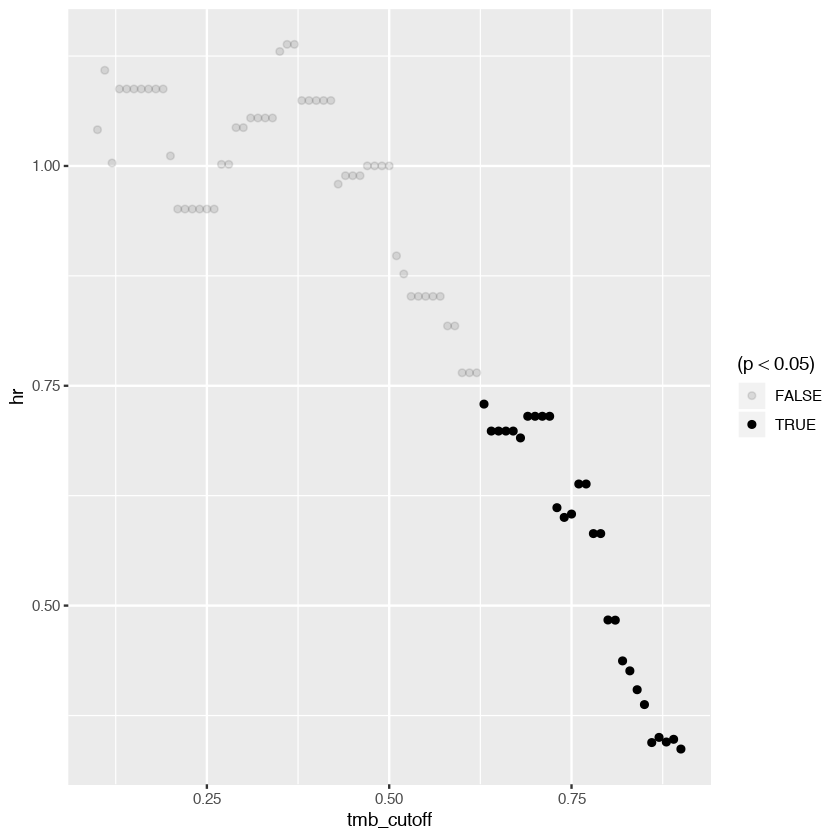

In [335]:
cutoff_hrs %>% 
    ggplot(aes(x = tmb_cutoff, y = hr, alpha = (p < 0.05))) + geom_point()

In [339]:
nsclc_matrix %>% 
    pull(TMB_SCORE) %>% 
    quantile(0.8)

80% 
13.824

### Immunotherapy vs nonimmunotherapy

In [15]:
nsclc_datasets <- cbio_getDataSets(path_name, "nsclc")

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "Their is no mutations file in archived_files"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "Their is no mutations file in brafresist"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "Their is no mutations file in case_lists"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "Their is no mutations file in prad_mskcc_2014"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "Their is no mutations file in sarc_mskcc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

In [60]:
nsclc_not_icb <- read_tsv(paste0(path_name,"/",nsclc_datasets[2],"/data_mutations_extended.txt"), comment = "#")
nsclc_not_icb <- bind_rows(lung_data[["training_data"]], lung_data[["test_data"]]) %>% 
    filter(study == nsclc_datasets[2])
nsclc_not_icb_patient <- read_tsv(paste0(path_name,"/",nsclc_datasets[2],"/data_clinical_patient.txt"), comment = "#") %>% 
    filter(!(is.na(OS_MONTHS) & is.na(OS_STATUS)))
nsclc_not_icb_sample <- read_tsv(paste0(path_name,"/",nsclc_datasets[2],"/data_clinical_sample.txt"), comment = "#") %>% 
    filter(PATIENT_ID %in% nsclc_not_icb_patient$PATIENT_ID)
nsclc_not_icb <- nsclc_not_icb %>% 
    filter(Tumor_Sample_Barcode %in% nsclc_not_icb_sample$SAMPLE_ID) 
nicb_patient_sample <- nsclc_not_icb_sample %>% 
    select(PATIENT_ID, SAMPLE_ID)


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_depth = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double()
  # ... with 24 more columns
)
See spec(...) for full column specifications.


In [74]:
nsclc_nicb_matrix_tmb <- TMB_Calc(nsclc_not_icb)

nsclc_nicb_matrix <- nsclc_not_icb %>% 
    filter(Hugo_Symbol %in% nsclc_gene_names) %>% 
    select(Tumor_Sample_Barcode, Hugo_Symbol) %>% 
    group_by(Tumor_Sample_Barcode, Hugo_Symbol) %>% 
    summarise(n = n()) %>% 
    ungroup() %>% 
    spread(Hugo_Symbol, n)

nsclc_nicb_matrix <- full_join(nsclc_nicb_matrix, nsclc_nicb_matrix_tmb, by = "Tumor_Sample_Barcode") %>% 
    mutate(TMB_SCORE = TMB)
nsclc_nicb_matrix <- full_join(nsclc_nicb_matrix, nicb_patient_sample, by = c("Tumor_Sample_Barcode" = "SAMPLE_ID"))
nsclc_nicb_matrix <- full_join(nsclc_nicb_matrix, nsclc_not_icb_patient, by = "PATIENT_ID")

nsclc_nicb_matrix[is.na(nsclc_nicb_matrix)] <- 0

for (col in intersect(nsclc_gene_names, colnames(nsclc_nicb_matrix))) {
    nsclc_nicb_matrix[[col]] <- factor(nsclc_nicb_matrix[[col]] > 0)
}
                                 

In [72]:
cols <- intersect(colnames(nsclc_matrix), colnames(nsclc_nicb_matrix))

nsclc_nicb_matrix <- nsclc_nicb_matrix %>% 
    select(!!!cols)

nsclc_icb_matrix <- nsclc_matrix %>% 
    select(!!!cols)

In [87]:
surv_nicb_nsclc <- Surv(time = nsclc_nicb_matrix$OS_MONTHS, event = (nsclc_nicb_matrix$OS_STATUS == "DECEASED"))
surv_icb_nsclc <- Surv(time = nsclc_icb_matrix$OS_MONTHS, event = (nsclc_icb_matrix$OS_STATUS == "DECEASED"))

In [89]:
nsclc_shared_genes <- setdiff(cols, c("Tumor_Sample_Barcode", "PATIENT_ID", "TMB_SCORE", "SEX", "OS_MONTHS", "OS_STATUS"))

In [91]:
nsclc_shared_genes %>% 
    length()

[1] 463

In [119]:
N <- length(nsclc_shared_genes)
icb_diff <- tibble(gene_name = nsclc_shared_genes, n_icb_muts = rep(0,N), icb_lower = rep(0, N), 
                   icb_hr = rep(0,N), icb_upper = rep(0,N), n_nicb_muts = rep(0,N), 
                   nicb_lower = rep(0,N), nicb_hr = rep(0,N), nicb_upper = rep(0,N))

for (i in 1:N) {
    
    gene <- nsclc_shared_genes[i]
    message(gene)
    icb_diff[i, "n_nicb_muts"] <- nsclc_nicb_matrix %>% 
        pull(!!gene) %>% 
        as.logical() %>% 
        sum()
    
    icb_diff[i, "n_icb_muts"] <- nsclc_icb_matrix %>% 
        pull(!!gene) %>% 
        as.logical() %>% 
        sum()
        
    nicb_form <- as.formula(paste("surv_nicb_nsclc ~", gene))
    icb_form <- as.formula(paste("surv_icb_nsclc ~", gene))
    
    if (icb_diff[i, "n_icb_muts"] > 0) {
        icb_ph <- summary(coxph(icb_form, data = nsclc_icb_matrix))$conf.int 
        icb_diff[i, "icb_lower"] <- icb_ph[1,3]
        icb_diff[i, "icb_hr"] <- icb_ph[1,1]
        icb_diff[i, "icb_upper"] <- icb_ph[1,4]
        }
    
    if (icb_diff[i, "n_nicb_muts"] > 0) {
        nicb_ph <- summary(coxph(nicb_form, data = nsclc_nicb_matrix))$conf.int
        icb_diff[i, "nicb_lower"] <- nicb_ph[1,3]
        icb_diff[i, "nicb_hr"] <- nicb_ph[1,1]
        icb_diff[i, "nicb_upper"] <- nicb_ph[1,4]
        }
    
    
}

ABL1
ACVR1
Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; beta may be infinite. ”AGO2
AKT1
AKT2
AKT3
ALK
ALOX12B
AMER1
ANKRD11
APC
AR
ARAF
ARID1A
ARID1B
ARID2
ARID5B
ASXL1
ASXL2
ATM
ATR
ATRX
AURKA
AURKB
Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; beta may be infinite. ”AXIN1
AXIN2
AXL
B2M
BABAM1
Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; beta may be infinite. ”BAP1
BARD1
BBC3
Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; beta may be infinite. ”Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; beta may be infinite. ”BCL10
Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Log

“Loglik converged before variable  1 ; beta may be infinite. ”KRAS
LATS1
LATS2
LMO1
Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; beta may be infinite. ”LYN
MALT1
MAP2K1
MAP2K2
MAP2K4
MAP3K1
MAP3K13
MAPK1
MAPK3
MAPKAP1
Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; beta may be infinite. ”MAX
MCL1
MDC1
MDM2
MDM4
Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; beta may be infinite. ”MED12
MEF2B
Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; beta may be infinite. ”Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; beta may be infinite. ”MEN1
MET
MGA
MITF
MLH1
MPL
MRE11A
MSH2
MSH3
Warning message in fitter(X, Y, strats, 

In [137]:
icb_diff %>% 
    mutate(overlap = - icb_lower + nicb_upper) %>% 
    arrange(overlap) %>% 
    filter(n_icb_muts > 10 & n_nicb_muts > 10) %>% 
    filter(icb_hr > 1) %>% 
    filter(icb_hr > nicb_hr)

gene_name,n_icb_muts,icb_lower,icb_hr,icb_upper,n_nicb_muts,nicb_lower,nicb_hr,nicb_upper,overlap
TP53,217,0.9060519,1.192192,1.568699,667,0.7807455,1.0096580,1.305687,0.3996350
KEAP1,70,0.9209999,1.275445,1.766298,140,0.7998587,1.0948621,1.498668,0.5776686
PTEN,16,0.7730657,1.383889,2.477342,62,0.5466187,0.8620654,1.359552,0.5864867
KDR,14,0.7143494,1.348035,2.543852,77,0.5642581,0.8994206,1.433665,0.7193160
STAG2,11,0.8114735,1.585705,3.098633,30,0.3470055,0.7351720,1.557548,0.7460750
SMARCA4,35,0.6859940,1.077249,1.691655,61,0.5545956,0.9194006,1.524169,0.8381750
NTRK1,13,0.6388748,1.247667,2.436583,22,0.2528962,0.6131582,1.486630,0.8477548
CTNNB1,13,0.5639729,1.144315,2.321842,20,0.1458042,0.4550819,1.420394,0.8564216
ATRX,18,0.6372606,1.116566,1.956374,58,0.5094180,0.8735941,1.498115,0.8608544
PBRM1,18,1.2370428,2.097845,3.557641,22,0.4173004,0.9378063,2.107548,0.8705053


In [151]:
nsclc_icb_matrix %>% 
    nrow()

nsclc_nicb_matrix %>% 
    nrow()

[1] 350

[1] 982

### Additional Literature Genes

In [229]:
more_genes <- c("BAM", "IFNGR1", "IFNGR2", "IRF1", "JAK1", "JAK2", "B2M", "JAK1", "JAK2")

In [230]:
extra_bed <- get_bed(more_genes)

In [231]:
extra_bed %>% 
    mutate(diff = chromEnd - chromStart) %>% 
    pull(diff) %>% 
    sum()

[1] 10878

In [232]:
ICB_plus_panel_genes <- c(read_tsv("/Users/jacobbradley/Documents/CCG/Data/ICB_panel_genes")$panel, more_genes)

Parsed with column specification:
cols(
  panel = col_character()
)


In [237]:
write_tsv(x = tibble(panel = ICB_plus_panel_genes), path = "/Users/jacobbradley/Documents/CCG/Data/ICB_plus_panel_genes")

In [234]:
ICB_plus_panel_bed <- get_bed(ICB_plus_panel_genes)

In [235]:
write_tsv(x = ICB_plus_panel_bed, path = "/Users/jacobbradley/Documents/CCG/Data/ICB_plus_panel.bed")